<a href="https://colab.research.google.com/github/m-hossni/Tensorflow-and-Keras-INFO-6146-F24/blob/main/project%20files/Traditional/Supervised/Jack_SVM_TF_Keras_PROJECT24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SUPPORT VECTOR MODEL (SVM)**
---
## **Group 3**

**Ghazi Al Barakeh, Mohamed Ali, Maher Alqarra, Jack Ivanisevic, Muhammad Usman Raza**

**Coded by:** Jack Ivanisevic

---

In [1]:
!pip install scikit-learn

In [2]:
# Import needed libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
import pandas as pd



In [3]:
# Check if any GPU devices are available
# Check if there are any GPU (Graphics Processing Unit) devices available on your system.
# The function tf.config.list_physical_devices('GPU') looks for GPUs that TensorFlow can use for processing.
if tf.config.list_physical_devices('GPU'):
    # If the previous line finds a GPU, this line prints "Using GPU" to let you know that TensorFlow will use the GPU for faster computations.
    print("Using GPU")
else:
    # If the first condition (checking for a GPU) is not met, this part runs. It prints "Using CPU," indicating that TensorFlow will use the CPU (Central Processing Unit) instead, which is typically slower for heavy computations compared to a GPU.
    print("Using CPU")

Using GPU


In [4]:
# Create a dictionary (a kind of data structure that pairs keys with values).
# 0, 1, 2, ..., 9: These are the keys representing class labels.
# 'T-shirt/top', 'Trouser', ..., 'Ankle boot': These are the values that describe each label.
fashion_labels = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress',
                  4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker',
                  8: 'Bag', 9: 'Ankle boot'}



In [5]:
# Load the Fashion MNIST dataset: split into training and testing subsets:
# train_images: Contains the images used for training the model.
# train_labels: Contains the corresponding labels (categories) for the training images.
# test_images: Contains the images used for testing the model's performance.
# test_labels: Contains the corresponding labels for the test images.
(train_images, train_labels), (test_images, test_labels)= fashion_mnist.load_data()

# Prepare training images: reshape the training images and normalizes their pixel values:
# train_images.reshape(-1, 28 * 28): flatten each 28x28 image into a single 1D array of 784 pixels.
# -1 allows NumPy to automatically determine the number of images based on the original array size.
# / 255.0: normalize the pixel values from a range of 0 to 255 to a range of 0 to 1. This scaling helps improve the model's learning efficiency.
x_train = train_images.reshape(-1, 28 * 28) / 255.0

# Prepare test images: flatten and normalizes the test images, ensuring consistency between the training and testing datasets.
x_test = test_images.reshape(-1, 28 * 28) / 255.0


# Check the shape of the data
# Print training data shape: output the shape of the x_train array to the console.
# provide insight into how many training samples there are and the structure of the data.
print(f"Training data shape: {x_train.shape}")

# Print test data shape: output the shape of the x_test array to the console, indicating how many test samples there are and their structure.
print(f"Test data shape: {x_test.shape}")

Training data shape: (60000, 784)
Test data shape: (10000, 784)


In [6]:
# Flatten the images
# x_train: training image data. Each image is originally a 28x28 grid of pixel values.
# reshape(x_train.shape[0], -1): change the shape of each image from 28x28 to a single row of 784 pixels (28 * 28).
# x_train.shape[0]: get the total number of images in the training set.
# -1: figure out how many columns to create based on the total number of pixels (784).
# / 255.0: divide each pixel value by 255 to convert it to a range between 0 and 1. This helps the model learn better since it works better with smaller values.
x_train = x_train.reshape(x_train.shape[0], -1) / 255.0

# Does tha same as the line above except for the test images.
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0

# Print out the shape (dimensions) of the training data after flattening. It shows how many images there are and the new format (e.g., (60000, 784) means 60,000 images, each with 784 pixels).
print(f"Flattened training data shape: {x_train.shape}")

# Print out the shape of the test data, letting you see how many test images were processed and their new format.
print(f"Flattened test data shape: {x_test.shape}")



Flattened training data shape: (60000, 784)
Flattened test data shape: (10000, 784)


****VISUAL MEAN IMAGE OF TRAINING SET****

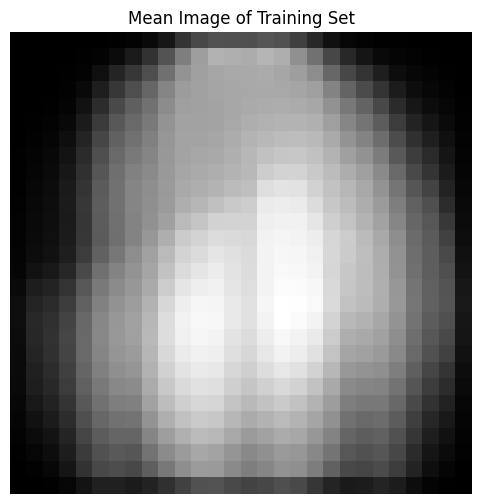

In [7]:
# Calculate the average pixel values for each pixel position across all training images.
# x_train.mean(axis=0) computes the mean for each pixel across all images, resulting in a 1D array of length 784 (28x28).
# reshape(28, 28) changes this 1D array back into a 2D format representing the average image.
mean_image = x_train.mean(axis=0).reshape(28, 28)

# Create a new figure
plt.figure(figsize=(6, 6))

# Display the mean image using the imshow function. cmap='gray' argument indicates that the image should be shown in grayscale.
plt.imshow(mean_image, cmap='gray')

# Set the title
plt.title('Mean Image of Training Set')

# turn off the axis labels and ticks, making the image cleaner and easier to view without distractions.
plt.axis('off')
plt.show()

In [8]:
# Create four new variables to hold different parts of the data.
# x_train_split: This will hold a portion of the training images.
# x_val_split: This will hold the remaining images that will be used for validation.
# y_train_split: This will hold the labels (the correct answers) for the images in x_train_split.
# y_val_split: This will hold the labels for the images in x_val_split.
# train_test_split(...):
# function that helps to split your data into two groups. It takes the training data and divides it into a training set and a validation set.
# x_train and train_labels:
# x_train: This is the original set of training images.
# train_labels: These are the correct labels (what each image represents) for those training images.
# test_size=0.2: specify that 20% of the original training data should be set aside for validation. the function will keep 80% of the images for
# training and use 20% for checking how well the model is doing.
# random_state=42: seed for random number generation. Ensure that every time we run this code, the split will be the same.
# Useful for consistency, so you can compare results over different runs.
x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(
    x_train, train_labels, test_size=0.2, random_state=42)

In [9]:
# Create a new Support Vector Machine (SVM) model using a linear kernel.
# max_iter=1000: Set the maximum number of times the model will try to learn from the data to 1000.
# tol=1e-3: Set a small tolerance level for stopping the training early if the model isn't improving much.
svm_model = LinearSVC(max_iter=1000, tol=1e-3)  # More iterations and relaxed tolerance

# This defines how many times the model will go through the entire training dataset.
num_epochs = 10

# Set the number of samples (images) to train on at one time.
chunk_size = 5000

# Shuffle training data and labels randomly.
# Help ensure that the model doesn’t learn any patterns from the order of the data.
x_train_split, y_train_split = shuffle(x_train_split, y_train_split)

loss_values = []

# Train the model in chunks and print progress
# Start a loop that will run for each epoch.
for epoch in range(num_epochs):
    # Print out the current epoch number so we can see the progress.
    print(f"Epoch {epoch + 1}/{num_epochs}")

    # Another loop that will go through the training data in chunks. It starts at 0 and goes up to the length of the training data,
    #incrementing by chunk_size (5000).
    for i in range(0, len(x_train_split), chunk_size):
        # This calculates the endpoint of the current chunk. Ensure that we don’t go beyond the total number of training samples.
        end = min(i + chunk_size, len(x_train_split))

        # Train the SVM model on the current chunk of training data and labels.The model learns from the specified portion of the data.
        svm_model.fit(x_train_split[i:end], y_train_split[i:end])

        # Predict on training data chunk to estimate loss
        y_train_pred = svm_model.predict(x_train_split[i:end])

        # Assuming you want to calculate accuracy as a proxy for loss
        current_loss = 1 - accuracy_score(y_train_split[i:end], y_train_pred)
        # or other appropriate loss function

        loss_values.append(current_loss)

        # Prints out which batch of samples is currently being trained on.
        print(f"Training on batch {i // chunk_size + 1}, samples {i} to {end}")

    # Predict on validation data
    # After each epoch, use the trained model to make predictions on the validation data.
    y_val_pred = svm_model.predict(x_val_split)

    # Calculate how accurate the model’s predictions are by comparing them to the true labels in the validation set.
    accuracy = accuracy_score(y_val_split, y_val_pred)

    # Print the validation accuracy after each epoch, showing how well the model is performing.
    print(f"Validation accuracy after epoch {epoch + 1}: {accuracy * 100:.2f}%\n")

# After all epochs are completed, print out the final validation accuracy.
print(f"Final Validation accuracy: {accuracy * 100:.2f}%\n")

Epoch 1/10
Training on batch 1, samples 0 to 5000
Training on batch 2, samples 5000 to 10000
Training on batch 3, samples 10000 to 15000
Training on batch 4, samples 15000 to 20000
Training on batch 5, samples 20000 to 25000
Training on batch 6, samples 25000 to 30000
Training on batch 7, samples 30000 to 35000
Training on batch 8, samples 35000 to 40000
Training on batch 9, samples 40000 to 45000
Training on batch 10, samples 45000 to 48000
Validation accuracy after epoch 1: 67.46%

Epoch 2/10
Training on batch 1, samples 0 to 5000
Training on batch 2, samples 5000 to 10000
Training on batch 3, samples 10000 to 15000
Training on batch 4, samples 15000 to 20000
Training on batch 5, samples 20000 to 25000
Training on batch 6, samples 25000 to 30000
Training on batch 7, samples 30000 to 35000
Training on batch 8, samples 35000 to 40000
Training on batch 9, samples 40000 to 45000
Training on batch 10, samples 45000 to 48000
Validation accuracy after epoch 2: 67.46%

Epoch 3/10
Training on

**TRAINING LOSS OVER EPOCHS EVALUATION**

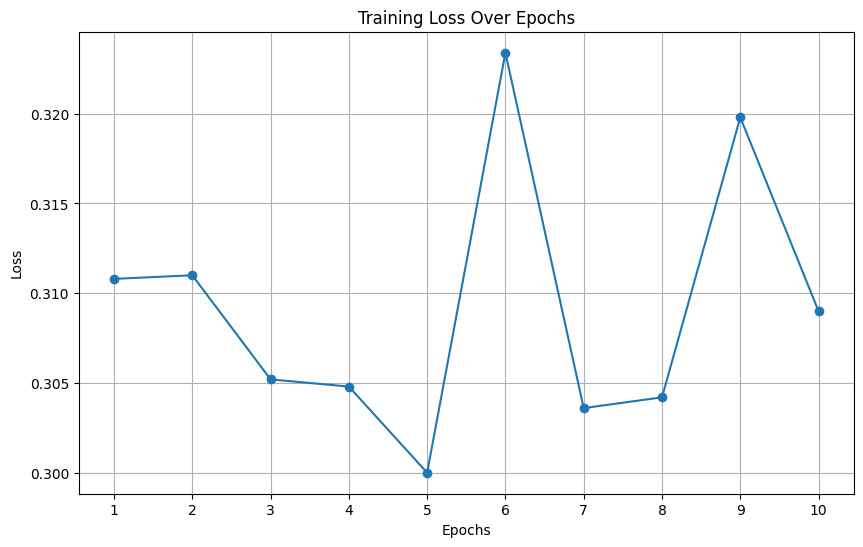

In [10]:
# After training is complete, plot the results
# Create a new figure
plt.figure(figsize=(10, 6))

# Calculate the average loss per epoch
# Create a list called epoch_loss that will store the average loss for each epoch.
# loss_values[i::num_epochs] takes every num_epochs-th value from the loss_values list, starting from index i.
# This grabs all the loss values corresponding to the i-th epoch.
# sum(...) add up those loss values, and divide by (len(loss_values) / num_epochs) gives the average loss for that epoch.
# The whole expression is a list comprehension, which builds the epoch_loss list in one go.
epoch_loss = [sum(loss_values[i::num_epochs]) / (len(loss_values) / num_epochs)  for i in range(num_epochs)]

# Create the actual plot: range(1, num_epochs + 1) generates a sequence of numbers from 1 to the number of epochs. This will be on the x-axis.
# epoch_loss provide the corresponding average loss values for the y-axis.
# marker='o' each data point will be marked with a circle,
# linestyle='-' means the points will be connected by a solid line.
plt.plot(range(1, num_epochs + 1), epoch_loss, marker='o', linestyle='-')

# Set the title
plt.title('Training Loss Over Epochs')

# Set teh x-axis label
plt.xlabel('Epochs')

# Set the y-axis label
plt.ylabel('Loss')

# Specify that the x-axis should have tick marks (labels) for each epoch, from 1 to the total number of epochs.
plt.xticks(range(1, num_epochs + 1))

# Add a grid to the plot, which makes it easier to read the values by providing horizontal and vertical lines.
plt.grid()

# Display the figure
plt.show()

In [11]:
# Predict on the test data
# Use the trained support vector machine (SVM) model (svm_model) to predict the labels for the test images (x_test).
# Predicted labels are stored in the variable y_test_pred.
y_test_pred = svm_model.predict(x_test)

# Calculate accuracy on test set
# Calculate the accuracy score using the accuracy_score function. It compares the true labels of the test set (test_labels) with the
# predicted labels (y_test_pred). The resulting accuracy (a value between 0 and 1, representing the fraction of correct predictions)
# is stored in the variable test_accuracy.
test_accuracy = accuracy_score(test_labels, y_test_pred)

# Print out the test accuracy as a percentage. Multiply the accuracy by 100 to convert it from a fraction to a percentage and format
# it to two decimal places for clarity. The output will indicate how well the model performed on the test data.
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

# Classification report
# Call the classification_report function, which provides a comprehensive summary of the model's performance.
# It includes metrics like precision, recall, and F1-score for each class, helping to evaluate how well the model predicts each category.
# The results are printed to the console.
print(classification_report(test_labels, y_test_pred))

Test accuracy: 67.19%
              precision    recall  f1-score   support

           0       0.71      0.70      0.70      1000
           1       0.85      0.94      0.89      1000
           2       0.58      0.51      0.54      1000
           3       0.73      0.71      0.72      1000
           4       0.53      0.64      0.58      1000
           5       0.42      0.66      0.52      1000
           6       1.00      0.00      0.00      1000
           7       0.68      0.90      0.78      1000
           8       0.85      0.78      0.81      1000
           9       0.86      0.88      0.87      1000

    accuracy                           0.67     10000
   macro avg       0.72      0.67      0.64     10000
weighted avg       0.72      0.67      0.64     10000



**CLASSIFICATION REPORT VISUALIZATION**

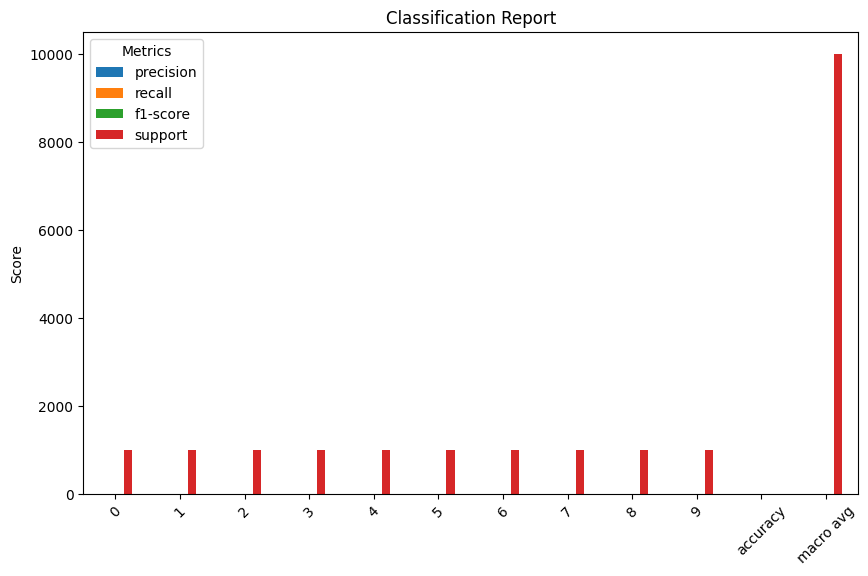

In [12]:
# Generate the classification report
# Create a detailed report that evaluates how well the model performed. Compare the actual labels (test_labels) with the predicted labels (y_test_pred).
# output_dict=True: the report will be returned as a dictionary (a data structure that holds key-value pairs), which makes it easier to work with in the next steps.
report = classification_report(test_labels, y_test_pred, output_dict=True)

# Create a DataFrame: take the report (which is in dictionary form) and converts it into a table (a DataFrame) using the pandas library.
# transpose(): switch the rows and columns of the table, making it easier to read.
report_df = pd.DataFrame(report).transpose()

# Plot precision, recall, and F1-score
# Plot precision, recall, and F1-score: starts the process of creating a bar chart to visualize the performance metrics of the model.
# report_df[:-1]: selects all rows except the last one (which usually contains overall statistics) for plotting.
# kind='bar': specifies that we want to create a bar chart.
# figsize=(10, 6): sets the size of the chart to be 10 inches wide and 6 inches tall.
report_df[:-1].plot(kind='bar', figsize=(10, 6))

# Set the title
plt.title('Classification Report')

# Set the y-axis label
plt.ylabel('Score')

# Rotate the labels on the horizontal axis by 45 degrees to make them easier to read
plt.xticks(rotation=45)

# Add a legend to the chart with the title "Metrics," which helps explain what each color or bar in the chart represents.
plt.legend(title='Metrics')

# Display the figure
plt.show()

**ERROR ANALYSIS EVALUATION**

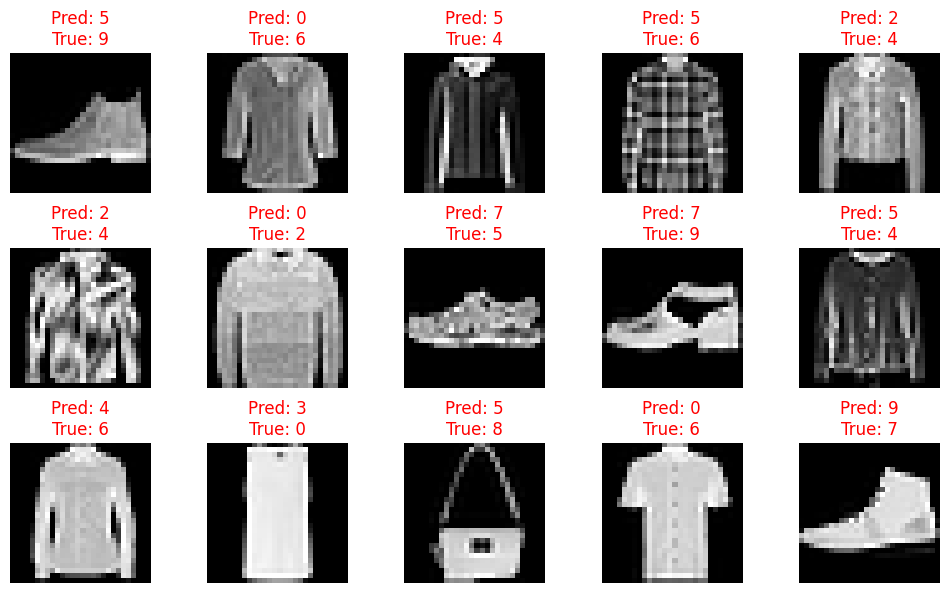

In [13]:
# Identify misclassified samples
# Identify misclassified samples: Create a list of indices (positions) where the model made incorrect predictions.
# len(test_labels): get the total number of test labels (the correct answers).
# if test_labels[i] != y_test_pred[i]: checks if the actual label (test_labels[i]) does not match the predicted label (y_test_pred[i]).
# If they don’t match, the index i is added to the list.
misclassified_indices = [i for i in range(len(test_labels)) if test_labels[i] != y_test_pred[i]]

# Create a figure for visualization
plt.figure(figsize=(10, 6))

# Loop through misclassified indices: start a loop that goes through the list of misclassified indices.
# enumerate(misclassified_indices[:15]): access both the index i (0 to 14 for the first 15 images) and the actual index idx
# from the list of misclassified samples.
# [:15] we’re only looking at the first 15 misclassified images
for i, idx in enumerate(misclassified_indices[:15]):
    # Create subplots: 3 rows, 5 columns: means we will have 3 rows of images, with 5 images in each row, for a total of 15 images.
    plt.subplot(3, 5, i + 1)  # 3 rows, 5 columns

    # Show the misclassified image in the current subplot.
    # x_test[idx].reshape(28, 28): reshape the flattened image back to its original size of 28x28 pixels.
    # cmap='gray': specify that the image should be displayed in grayscale.
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')

    # Add a title to each image that shows both the predicted label and the actual label.
    # f"Pred: {y_test_pred[idx]}\nTrue: {test_labels[idx]}": create a formatted string displaying the predicted label (from the model)
    # and the true label (the correct answer).
    # color='red': set the title color to red for emphasis.
    plt.title(f"Pred: {y_test_pred[idx]}\nTrue: {test_labels[idx]}", color='red')

    # Hide the axes (the lines and numbers around the image) so that only the image is visible.
    plt.axis('off')

# Ensure that the images and titles are spaced nicely within the figure, preventing them from overlapping.
# pad=1.0: This sets the amount of padding (space) between subplots to 1 unit.
plt.tight_layout(pad=1.0)  # Add padding to prevent overlap

# Display the figure
plt.show()

**SAMPLE OF PREDICTIONS**

NameError: name 'pred_label_name' is not defined

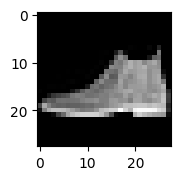

In [14]:
# Create a figure
plt.figure(figsize=(15, 8))

# Loop through 20 images
for i in range(20):
    # Create subplots 4 rows X 5 columns
    plt.subplot(4, 5, i+1)
    # Show the current image in the designated subplot.
    # x_test[i].reshape(28, 28): reshape the flattened image back to its original size of 28x28 pixels so that it can be displayed correctly.
    # cmap='gray': specify that the image should be displayed in grayscale (black and white).
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')

    # Get the predicted label: retrieve the name of the predicted label for the current image based on the model's prediction.
    # fashion_labels[y_test_pred[i]]: use the predicted label index to find the corresponding label name from the fashion_labels dictionary.
    # pred_label_name = fashion_labels[y_test_pred[i]]
    # Access the true label using test_labels
    true_label_name = fashion_labels[test_labels[i]]

    # Set the ttitle
    plt.title(f"Pred: {pred_label_name}\nTrue: {true_label_name}")

    # Hide the axes (the lines and numbers around the image) so that only the image is visible.
    plt.axis('off')

# Adjust the layout os plots dont overlap
plt.tight_layout()

# Display the figure
plt.show()